# Deep Learning for Image Classification

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.

## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set of hyperparameters in order to obtain the best accuracy on the test set!


In [1]:
%matplotlib inline

In [2]:
# Python 2/3 compatibility
from __future__ import print_function, division

import time
import numpy as np

# Import plotting functions
from plot_utils import plot_confusion_matrix, imshow, plot_losses

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploits its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Variable and automatic differentiation


### 1. Install Pytorch

Go to [http://pytorch.org/](http://pytorch.org/) and select the right version (windows is not currently officially supported but you can try this [link](https://www.superdatascience.com/pytorch/))

Optionally you can use a docker image. See images on [docker hub](https://hub.docker.com/search/?isAutomated=0&isOfficial=0&page=1&pullCount=0&q=pytorch&starCount=0) or build it from the official repo: [https://github.com/pytorch/pytorch#docker-image](https://github.com/pytorch/pytorch#docker-image)

[Official Tutorial](http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)

In [3]:
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th

### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

In [4]:
# Create tensors (FloatTensor by default)
zeros = th.zeros(3)

print("Float Tensor of zeros")
print(zeros)

Float Tensor of zeros

 0
 0
 0
[torch.FloatTensor of size 3]



Tensor can only contain one data type (Int, Float, Double, ...).
However, tensor can be cast to other types. For examples, you can use the `.int()` method to convert a FloatTensor into an IntTensor

In [5]:
float_tensor = 1.1 * th.ones(3, 2)
# Convert FloatTensor to Int tensor
int_tensor = float_tensor.int()

print("Float Tensor")
print(float_tensor)

print("Tensor converted to Int Tensor (transposed)")
print(int_tensor.transpose(dim0=0, dim1=1))

Float Tensor

 1.1000  1.1000
 1.1000  1.1000
 1.1000  1.1000
[torch.FloatTensor of size 3x2]

Tensor converted to Int Tensor (transposed)

 1  1  1
 1  1  1
[torch.IntTensor of size 2x3]



To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [6]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(float_tensor.size()))

Tensor Shape: torch.Size([3, 2])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [7]:
2 * float_tensor + 1


 3.2000  3.2000
 3.2000  3.2000
 3.2000  3.2000
[torch.FloatTensor of size 3x2]

Example of matrix multiplication:

In [8]:
# Sample from random uniform distribution
a = th.rand(3, 1)
b = th.rand(1, 3)
# Matrix Multiplication
result = th.mm(a, b)

print("Size of the resulting tensor after matrix multiplication:")
print(result.size())

Size of the resulting tensor after matrix multiplication:
torch.Size([3, 3])


PyTorch tensors also supports numpy indexing:

In [9]:
print("\n Indexing Demo:")
print(result[:, 1])


 Indexing Demo:

 0.4880
 0.2791
 0.4922
[torch.FloatTensor of size 3]



### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy to PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function

(here `th.from_numpy()` because we renamed *torch* as *th*)

In [10]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is pass by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
ones_matrix[0, 0] = 5

print("Numpy Matrix:")
print(ones_matrix)

print("PyTorch Tensor:")
print(ones_tensor)

Numpy Matrix:
[[ 5.  1.]
 [ 1.  1.]]
PyTorch Tensor:

 5  1
 1  1
[torch.FloatTensor of size 2x2]



#### PyTorch to Numpy

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [11]:
zeros_tensor = th.zeros(3, 3)
zeros_matrix = zeros_tensor.numpy()

zeros_tensor[1, 1] = 5.5

print(zeros_tensor, zeros_matrix)


 0.0000  0.0000  0.0000
 0.0000  5.5000  0.0000
 0.0000  0.0000  0.0000
[torch.FloatTensor of size 3x3]
 [[ 0.   0.   0. ]
 [ 0.   5.5  0. ]
 [ 0.   0.   0. ]]


### 4. Variables and Automatic Differentiation

PyTorch Variable **wraps a Tensor**, and supports nearly all of operations defined on it.
But the real interest in using Variables is that they allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the associated tensor through the  `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.


In [12]:
from torch.autograd import Variable

In [13]:
# Variables are wrapper of tensors
# so we first need to create a tensor
ones_tensor = th.ones(2,2)

# Then we can create a variable 
ones_variable = Variable(ones_tensor)
print(ones_variable)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



The original tensor is accessible via the `.data` attribute:

In [14]:
print("Original Tensor (using .data):")
print(ones_variable.data)

Original Tensor (using .data):

 1  1
 1  1
[torch.FloatTensor of size 2x2]



If we modify the tensor,
changes will be also made to the variable data

In [15]:
ones_tensor[0, 0] = 20

# Modified Variable
print(ones_variable)

# Variable supports most of tensor operations, such as indexing:
print(ones_variable[0, 0])

Variable containing:
 20   1
  1   1
[torch.FloatTensor of size 2x2]

Variable containing:
 20
[torch.FloatTensor of size 1]



To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [16]:
# Variables are wrapper of tensors
# so we first need to create a tensor
input_tensor = th.ones(1)

# Create a variable and tell PyTorch
# that we want to compute the gradient
x = Variable(input_tensor, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

Variable containing:
 7
[torch.FloatTensor of size 1]



Let's backprop !

In [17]:
y.backward()

`x.grad` print gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [18]:
x.grad

Variable containing:
 2
[torch.FloatTensor of size 1]

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### Bonus: PyTorch and GPU (CUDA support)

If your computer has a CUDA enabled GPU, you can move
tensor/variables the GPU by simply using the `.cuda()` method.
Otherwise, PyTorch will use your CPU.

```python
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = x + y
    # Convert to numpy array
    # we first need to move the tensor back to the cpu
    z_matrix = z.cpu().numpy()
```


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [20]:
seed = 2
np.random.seed(seed)
torch.manual_seed(seed)

### Define subset of the dataset (so it is faster to train)

In [21]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 20000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [22]:
num_workers = 2
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, sampler=test_sampler,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



      bird       ship       frog      horse


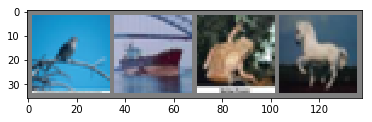

In [23]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [24]:
# Useful imports
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling,
one fully connected layer and the output layer

In [25]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(18 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x14x14
        x = F.relu(self.conv1(x))
        # 18x14x14 -> 18x7x7
        x = self.pool(x)
        # 18x7x7 -> 882
        x = x.view(-1, 18 * 7 * 7)
        # 882 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

#### Linear Classifier

In [26]:
class LinearClassifier(nn.Module):
    """
    Linear Classifier
    """
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten input 3x32x32 -> 3072
        x = x.view(x.size(0), -1)
        return self.linear(x)

### 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionnaly SGD with momentum)



In [27]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize



#### Hyperparameters

In [28]:
learning_rate = 0.001
batch_size = 32
n_epochs = 10

#### Data loader

In [29]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batchsize for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~15s per epoch with batch_size = 16

In [30]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statitics of the training
    
    :param  net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            total_train_loss += loss.data[0]

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        ## Do a pass on the validation set
        for inputs, labels in val_loader:
            # Wrap Tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)
            # Forward pass
            predictions = net(inputs)
            val_loss = criterion(predictions, labels)
            total_val_loss += val_loss.data[0]
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [31]:
net = SimpleConvolutionalNetwork()

train_history, val_history = train(net, batch_size, n_epochs, learning_rate)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.12 took: 0.73s
Epoch 1, 20% 	 train_loss: 1.86 took: 0.90s
Epoch 1, 30% 	 train_loss: 1.71 took: 0.59s
Epoch 1, 40% 	 train_loss: 1.68 took: 0.75s
Epoch 1, 50% 	 train_loss: 1.66 took: 0.60s
Epoch 1, 60% 	 train_loss: 1.56 took: 0.60s
Epoch 1, 70% 	 train_loss: 1.56 took: 0.73s
Epoch 1, 80% 	 train_loss: 1.50 took: 0.61s
Epoch 1, 90% 	 train_loss: 1.53 took: 0.62s
Validation loss = 1.41
Epoch 2, 10% 	 train_loss: 1.42 took: 0.64s
Epoch 2, 20% 	 train_loss: 1.41 took: 0.71s
Epoch 2, 30% 	 train_loss: 1.39 took: 0.71s
Epoch 2, 40% 	 train_loss: 1.44 took: 0.66s
Epoch 2, 50% 	 train_loss: 1.38 took: 0.70s
Epoch 2, 60% 	 train_loss: 1.34 took: 0.72s
Epoch 2, 70% 	 train_loss: 1.33 took: 0.72s
Epoch 2, 80% 	 train_loss: 1.37 took: 0.66s
Epoch 2, 90% 	 train_loss: 1.34 took: 0.66s
Validation loss = 1.27
Epoch 3, 10% 	 train_loss: 1.28 took: 0.71s
Epoch 3, 20% 	 train_loss: 1.24 took: 0.7

Now, let's look at the evolution of the losses

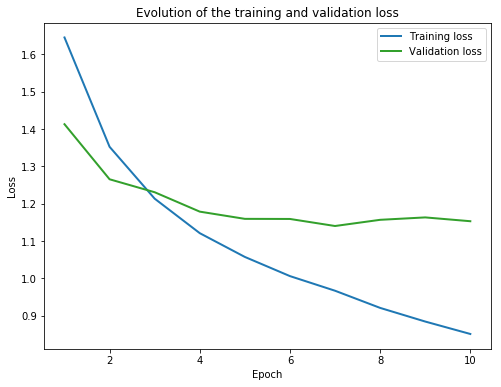

In [32]:
plot_losses(train_history, val_history)

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Gound truth:

      frog       bird       bird       ship


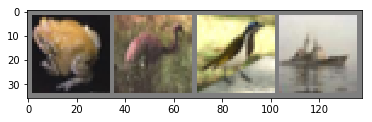

In [33]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print("Gound truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [34]:
outputs = net(Variable(images))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



Predicted:

      frog      horse       bird      plane


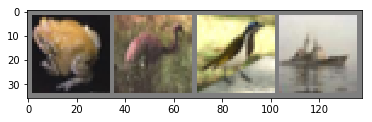

In [35]:
_, predicted = torch.max(outputs.data, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [36]:
def dataset_accuracy(net, data_loader, name=""):
    correct = 0
    total = 0
    for data in data_loader:
        images, labels = data
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * correct / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
print("Computing accuracy...")
compute_accuracy(net)

Computing accuracy...
Accuracy of the network on the 20000 train images: 68.59 %
Accuracy of the network on the 5000 validation images: 59.60 %
Accuracy of the network on the 5000 test images: 60.56 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieve around 30% accuracy.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [37]:
def accuracy_per_class(net):
    n_classes = 10
    class_correct = list(0. for i in range(n_classes))
    class_total = list(0. for i in range(n_classes))
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for data in test_loader:
        images, labels = data
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        print('{:<10} {:^10.2f}'.format(
            classes[i], 100 * class_correct[i] / class_total[i]))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        57.99   
car          65.94   
bird         49.22   
cat          42.86   
deer         44.77   
dog          47.54   
frog         81.06   
horse        69.49   
ship         78.97   
truck        67.84   


### Confusion Matrix

Let's look at what type of error our networks makes...

Hmm, it seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs...

Also, it classifies a lot of trucks as cars.

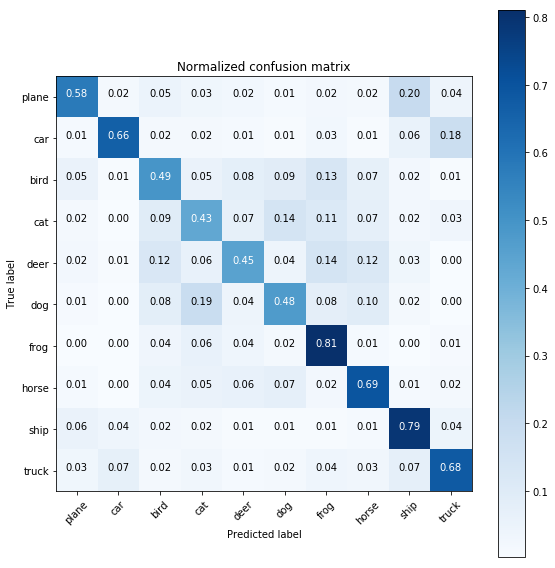

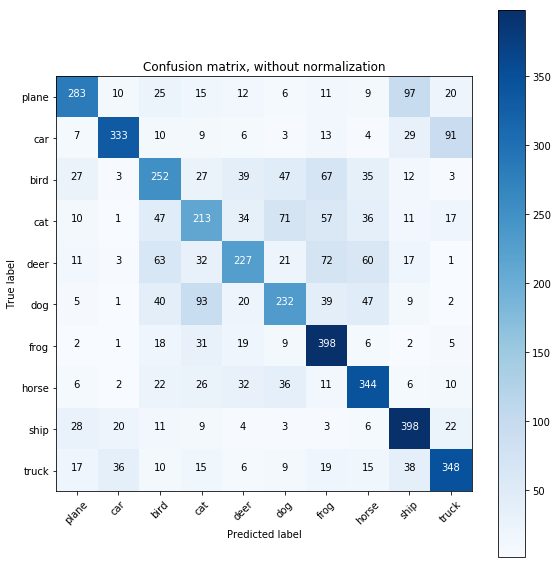

In [38]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# III. Exploring CNN Architectures

Now, that's your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and set of hyperparameters in order to obtain the best accuracy on the test set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start changing the batch_size, number of epochs and then try adding more convolutional layers.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ is:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [39]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example use of get_output_size() helper

Let's assume your have an input volume of size 3x32x32 (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

get_output_size() function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, the output volume is 18x14x14

In [40]:
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size)

14


Below is the neural network you have to edit:

In [41]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`: the input size of self.fc1)
        # self.conv2 = ...
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 7 * 7
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x14x14
        x = F.relu(self.conv1(x))
        # 18x14x14 -> 18x7x7
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x7x7 -> 882
        x = x.view(-1, self.flattened_size)
        # 882 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [42]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.12 took: 0.76s
Epoch 1, 20% 	 train_loss: 1.91 took: 0.58s
Epoch 1, 30% 	 train_loss: 1.76 took: 0.74s
Epoch 1, 40% 	 train_loss: 1.71 took: 0.79s
Epoch 1, 50% 	 train_loss: 1.63 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.60 took: 0.74s
Epoch 1, 70% 	 train_loss: 1.54 took: 0.82s
Epoch 1, 80% 	 train_loss: 1.56 took: 0.84s
Epoch 1, 90% 	 train_loss: 1.51 took: 0.69s
Validation loss = 1.41
Epoch 2, 10% 	 train_loss: 1.38 took: 0.78s
Epoch 2, 20% 	 train_loss: 1.40 took: 0.73s
Epoch 2, 30% 	 train_loss: 1.39 took: 0.73s
Epoch 2, 40% 	 train_loss: 1.41 took: 0.80s
Epoch 2, 50% 	 train_loss: 1.34 took: 0.67s
Epoch 2, 60% 	 train_loss: 1.32 took: 0.65s
Epoch 2, 70% 	 train_loss: 1.37 took: 0.71s
Epoch 2, 80% 	 train_loss: 1.37 took: 0.68s
Epoch 2, 90% 	 train_loss: 1.35 took: 0.71s
Validation loss = 1.33
Epoch 3, 10% 	 train_loss: 1.26 took: 0.73s
Epoch 3, 20% 	 train_loss: 1.28 took: 0.7

### Losses Plot

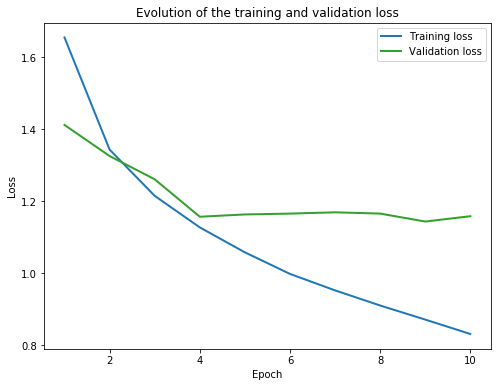

In [43]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [44]:
compute_accuracy(net)

Accuracy of the network on the 20000 train images: 71.98 %
Accuracy of the network on the 5000 validation images: 61.66 %
Accuracy of the network on the 5000 test images: 60.54 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>60.56 %</td>
</tr>
</table>

In [45]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        62.50   
car          71.09   
bird         41.80   
cat          38.03   
deer         60.95   
dog          44.88   
frog         69.65   
horse        66.87   
ship         88.10   
truck        61.40   


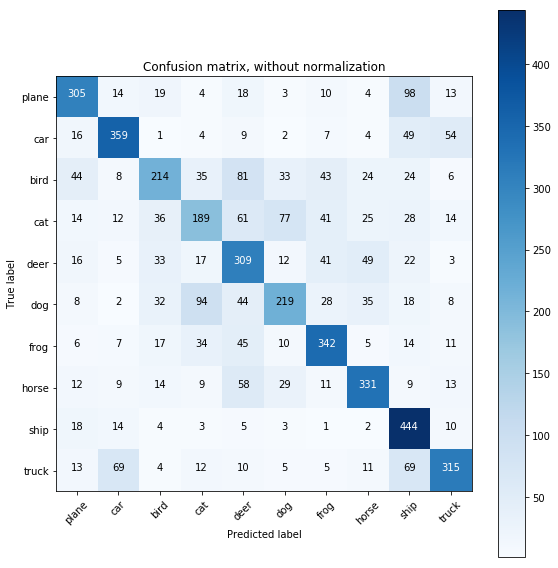

In [46]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Standford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)